Work distribution


Yipeng Zhang - data collection, data analysis and preprocessing.


Ziyang Jiang - data classification for training, improving classification accuracy, creating a data warehouse.


Yanze Zheng - data collection, data training and data testing

#Static Data Collection#

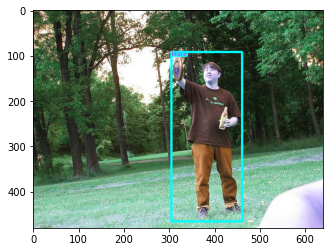

True

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_test = pd.read_csv("/Data/test.csv")
df_train = pd.read_csv("/Data/train.csv")

# helper function to determine if the aimed emotion exist
def isAimedEmotion(L):
  if 'Happiness' in L:
    return 'needed'
  elif 'Confidence' in L:
    return 'needed'
  elif 'Excitiment' in L:
    return 'needed'
  return 'remove'

# select needed images
df_test['signal'] = df_test['Categorical_Labels'].apply(lambda x :isAimedEmotion(x))                                                                                                                                                            
df_test = df_test[df_test['signal'] == 'needed']
df_train['signal'] = df_train['Categorical_Labels'].apply(lambda x :isAimedEmotion(x))
df_train = df_train[df_train['signal'] == 'needed']

# image prepocessing
import cv2

class_name = df_train['Gender'].to_list()[0]
LeftTop = np.array([305, 92])
RightBottom =([461, 465])

# bounder box color
color = (0, 255, 255)
# line width
width = 4

src = cv2.imread('/Data/emotic/' + df_train['Folder'].to_list()[0]+'/'+df_train['Filename'].to_list()[0])

cv2.rectangle(src, tuple(LeftTop), tuple(RightBottom), color, width, 2)

# get size of text 
t_size = cv2.getTextSize(class_name, 1, cv2.FONT_HERSHEY_PLAIN, 1)[0]
# get right button position of text
textlbottom = LeftTop + np.array(list(t_size))
# draw the text bounder
cv2.rectangle(src, tuple(LeftTop), tuple(textlbottom), color, -1)
LeftTop[1] = LeftTop[1] + (t_size[1]/2 + 4)
# write
cv2.putText(src, class_name , tuple(LeftTop), cv2.FONT_HERSHEY_PLAIN, 1.0, (255, 0, 255), 1)

plt.figure("Image")
plt.imshow(src)
plt.show()
cv2.imwrite('example.png', src)

#Dynamic Data Collection#

In [ ]:
!pip install requests

In [ ]:
import requests
import os

#check if is the first run
isFirstRun = True

# helper function to create the folder
def mkdir(path):
  folder = os.path.exists(path)
  if not folder:
    os.makedirs(path)
    print("New Folder Created")
  else:
    print("All Folder Already Exist")
    global isFirstRun
    isFirstRun = False

mkdir("./Excitement")
mkdir("./Happiness")
mkdir("./Satisfaction")

# if is the first run, then start the process
if isFirstRun:

  # mID of the needed emotions from GIFGIF
  Excitement = '54a309ae1c61be23aba0da59'
  Happiness = '54a309ae1c61be23aba0da5c'
  Satisfaction = '54a309ae1c61be23aba0da61'

  # download limit
  limit = 50

  # get response message 
  # get Excitement gifs
  response = requests.get("https://www.qnt.io/api/results?pID=gifgif&mID=" + Excitement + "&limit=" + str(limit) + "&key=54a309ac1c61be23aba0da3f")

  gifs = response.json()["results"]

  for i in range(limit):
    with open("Excitement/Excitement" + str(i) + ".gif", "wb") as img:
      img.write(requests.get(gifs[i]['content_data']['embedLink']).content)
      img.close()

  # get response message 
  # get Happiness gifs
  response = requests.get("https://www.qnt.io/api/results?pID=gifgif&mID=" + Happiness + "&limit=" + str(limit) + "&key=54a309ac1c61be23aba0da3f")

  gifs = response.json()["results"]

  for i in range(limit):
    with open("Happiness/Happiness" + str(i) + ".gif", "wb") as img:
      img.write(requests.get(gifs[i]['content_data']['embedLink']).content)
      img.close()

  # get response message 
  # get Satisfaction gifs
  response = requests.get("https://www.qnt.io/api/results?pID=gifgif&mID=" + Satisfaction + "&limit=" + str(limit) + "&key=54a309ac1c61be23aba0da3f")

  gifs = response.json()["results"]

  for i in range(limit):
    with open("Satisfaction/Satisfaction" + str(i) + ".gif", "wb") as img:
      img.write(requests.get(gifs[i]['content_data']['embedLink']).content)
      img.close()

All Folder Already Exist
All Folder Already Exist
All Folder Already Exist


#Feature Extraction#

In [ ]:
# https://www.adamsmith.haus/python/examples/4892/pil-extract-frames-from-an-animated-gif
# https://stackoverflow.com/questions/7503567/python-how-i-can-get-gif-frames
from PIL import Image
import os
import re
# save frames to folders below
mkdir("./Excitement_img")
mkdir("./Happiness_img")
mkdir("./Satisfaction_img")
#capture frames from Excitement gifs
for file in os.listdir('./Excitement'):
  s = re.findall(r'\d+', file)
  gif_path = os.path.join('./Excitement', file)
  gif = Image.open(gif_path)
  try:
    while 1:
        gif.seek(gif.tell()+1) # total number of frames
  except EOFError:
      pass
  mid_frame = round((gif.tell())/2) # mid number of frames
  gif.seek(0) # first frame
  gif.save('./Excitement_img/Excitement_start_'+s[0]+'.png')
  gif.seek(mid_frame) # mid frame
  gif.save('./Excitement_img/Excitement_mid_'+s[0]+'.png') 
#capture frames from Happiness gifs
for file in os.listdir('./Happiness'):
  s = re.findall(r'\d+', file)
  gif_path = os.path.join('./Happiness', file) 
  gif = Image.open(gif_path)
  try:
    while 1:
        gif.seek(gif.tell()+1)
  except EOFError:
      pass
  mid_frame = round((gif.tell())/2)
  gif.seek(0)
  gif.save('./Happiness_img/Happiness_start_'+s[0]+'.png')
  gif.seek(mid_frame)
  gif.save('./Happiness_img/Happiness_mid_'+s[0]+'.png')
# capture frames from Satisfaction gifs
for file in os.listdir('./Satisfaction'):
  s = re.findall(r'\d+', file)
  gif_path = os.path.join('./Satisfaction', file)
  gif = Image.open(gif_path)
  try:
    while 1:
        gif.seek(gif.tell()+1)
  except EOFError:
      pass
  mid_frame = round((gif.tell())/2)
  gif.seek(0)
  gif.save('./Satisfaction_img/Satisfaction_start_'+s[0]+'.png')
  gif.seek(mid_frame)
  gif.save('./Satisfaction_img/Satisfaction_mid_'+s[0]+'.png')

All Folder Already Exist
All Folder Already Exist
All Folder Already Exist


In [ ]:
!pip install py-feat

In [ ]:
# https://py-feat.org/content/analysis.html
from feat import Fex
from feat import Detector
import os, glob
fex = Fex()
au_model = "rf" #Random Forest model trained on Histogram of Oriented Gradients for Action Unit detection
detector = Detector(au_model = au_model)

test_images = [file for file in glob.glob(os.path.join('./Data/emotic/ade20k/images/', "*.jpg")) if not os.path.basename(file).startswith('no-face')]
image_prediction = detector.detect_image(test_images, outputFname = "./Data/ade20kAU.csv")
test_images = [file for file in glob.glob(os.path.join('./Data/emotic/emodb_small/images', "*.jpg")) if not os.path.basename(file).startswith('no-face')]
image_prediction = detector.detect_image(test_images, outputFname = "./Data/emodb_smallAU.csv")
test_images = [file for file in glob.glob(os.path.join('./Excitement_img', "*.png")) if not os.path.basename(file).startswith('no-face')]
image_prediction = detector.detect_image(test_images, outputFname = "./Data/ExcitementAU.csv")
test_images = [file for file in glob.glob(os.path.join('./Happiness_img', "*.png")) if not os.path.basename(file).startswith('no-face')]
image_prediction = detector.detect_image(test_images, outputFname = "./Data/HappinessAU.csv")
test_images = [file for file in glob.glob(os.path.join('./Satisfaction_img', "*.png")) if not os.path.basename(file).startswith('no-face')]
image_prediction = detector.detect_image(test_images, outputFname = "./Data/SatisfactionAU.csv")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/nilearn/input_data/__init__.py:27: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)


Loading Face Detection model:  retinaface
Using downloaded and verified file: /usr/local/lib/python3.7/dist-packages/feat/resources/mobilenet0.25_Final.pth
Using downloaded and verified file: /usr/local/lib/python3.7/dist-packages/feat/resources/mobilenet_224_model_best_gdconv_external.pth.tar
Using downloaded and verified file: /usr/local/lib/python3.7/dist-packages/feat/resources/hog_pca_all_emotio.joblib
Using downloaded and verified file: /usr/local/lib/python3.7/dist-packages/feat/resources/hog_pca_all_emotio.joblib
Using downloaded and verified file: /usr/local/lib/python3.7/dist-packages/feat/resources/hog_scalar_aus.joblib
Using downloaded and verified file: /usr/local/lib/python3.7/dist-packages/feat/resources/RF_568.joblib
Using downloaded and verified file: /usr/local/lib/python3.7/dist-packages/feat/resources/hog_pca_all_emotio.joblib
Using downloaded and verified file: /usr/local/lib/python3.7/dist-packages/feat/resources/hog_scalar_aus.joblib
Using downloaded and verified

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator PCA from version 0.24.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.24.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.24.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your

Loading emotion model:  resmasknet
exception occurred
exception occurred
exception occurred
exception occurred
exception occurred
exception occurred
exception occurred
exception occurred
exception occurred
exception occurred
exception occurred
exception occurred
exception occurred
exception occurred
exception occurred
exception occurred
exception occurred
exception occurred
exception occurred
exception occurred
exception occurred
exception occurred
exception occurred
exception occurred
exception occurred
exception occurred
exception occurred
exception occurred
exception occurred
exception occurred
exception occurred
exception occurred
exception occurred
exception occurred
exception occurred
exception occurred
exception occurred
exception occurred
exception occurred
exception occurred
exception occurred
exception occurred
exception occurred
exception occurred
exception occurred
exception occurred
exception occurred
exception occurred
exception occurred
exception occurred
exception occur

In [ ]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html
# https://docs.python.org/3/library/csv.html
# https://www.geeksforgeeks.org/reading-rows-from-a-csv-file-in-python/
import os
import csv

i = 0
data = pd.read_csv("./ade20kAU.csv")
df_train_1 = pd.DataFrame(data, columns= ['AU01', 'AU02', 'AU04', 'AU05', 'AU06', 'AU07', 'AU09', 'AU10', 'AU11', 'AU12', 'AU14', 'AU15', 'AU17', 'AU20', 'AU23', 'AU24', 'AU25', 'AU26', 'AU28', 'AU43', 'input'])
with open('ade20kAU.csv') as file_obj:
    reader_obj = csv.reader(file_obj)
    for row in reader_obj:
        df_train_1.input[i] = os.path.basename(df_train_1.input[i])
        if (i != 1436):
          i = i + 1
        else:
          i = 1436

data = pd.read_csv("./emodb_smallAU.csv")
df_train_2 = pd.DataFrame(data, columns= ['AU01', 'AU02', 'AU04', 'AU05', 'AU06', 'AU07', 'AU09', 'AU10', 'AU11', 'AU12', 'AU14', 'AU15', 'AU17', 'AU20', 'AU23', 'AU24', 'AU25', 'AU26', 'AU28', 'AU43', 'input'])
num_rows = 0
for row in open("./emodb_smallAU.csv"):
  df_train_2.input[num_rows] = os.path.basename(df_train_2.input[num_rows])
  if (num_rows != 2689):
      num_rows = num_rows + 1
  else:
      num_rows = 2689

num_rows = 0
data = pd.read_csv("./ExcitementAU.csv")
df_excitement = pd.DataFrame(data, columns= ['AU01', 'AU02', 'AU04', 'AU05', 'AU06', 'AU07', 'AU09', 'AU10', 'AU11', 'AU12', 'AU14', 'AU15', 'AU17', 'AU20', 'AU23', 'AU24', 'AU25', 'AU26', 'AU28', 'AU43', 'input'])
for row in open("./ExcitementAU.csv"):
  df_excitement.input[num_rows] = os.path.basename(df_excitement.input[num_rows])
  if (num_rows != 241):
      num_rows = num_rows + 1
  else:
      num_rows = 241

num_rows = 0
data = pd.read_csv("./HappinessAU.csv")
df_happiness = pd.DataFrame(data, columns= ['AU01', 'AU02', 'AU04', 'AU05', 'AU06', 'AU07', 'AU09', 'AU10', 'AU11', 'AU12', 'AU14', 'AU15', 'AU17', 'AU20', 'AU23', 'AU24', 'AU25', 'AU26', 'AU28', 'AU43', 'input'])
for row in open("./HappinessAU.csv"):
  df_happiness.input[num_rows] = os.path.basename(df_happiness.input[num_rows])
  if (num_rows != 131):
      num_rows = num_rows + 1
  else:
      num_rows = 131

num_rows = 0
data = pd.read_csv("./SatisfactionAU.csv")
df_satisfaction = pd.DataFrame(data, columns= ['AU01', 'AU02', 'AU04', 'AU05', 'AU06', 'AU07', 'AU09', 'AU10', 'AU11', 'AU12', 'AU14', 'AU15', 'AU17', 'AU20', 'AU23', 'AU24', 'AU25', 'AU26', 'AU28', 'AU43', 'input'])
for row in open("./SatisfactionAU.csv"):
  df_Satisfaction.input[num_rows] = os.path.basename(df_Satisfaction.input[num_rows])
  if (num_rows != 141):
      num_rows = num_rows + 1
  else:
      num_rows = 141
df_train_1.rename(columns = {'input' : 'Filename'}, inplace = True)
df_train_2.rename(columns = {'input' : 'Filename'}, inplace = True)
df_excitement.rename(columns = {'input' : 'Filename'}, inplace = True)
df_happiness.rename(columns = {'input' : 'Filename'}, inplace = True)
df_satisfaction.rename(columns = {'input' : 'Filename'}, inplace = True)
df_train_1 = df_train_1.merge(df_train, how='inner', on='Filename')
df_train_2 = df_train_2.merge(df_train, how='inner', on='Filename')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.